<a href="https://colab.research.google.com/github/Oziel-Torres/LasActividadesVanAqui/blob/main/PIA_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El Primer paso es importar las librerias que vamos a usar

In [57]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras import datasets, layers, models

El segundo paso es cargar los datos a utilizar en este caso vas a utilizar de la libreria de keras el set de datos de mnist, tambien lo dividimos en datos de entrenamiento y de prueba.

In [58]:
objects =  tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = objects.load_data()

Comprobamos la visualizacion de los datos, podemos cambiar los valores en "plt.imshow(train_images[])" para ver diferentes numeros.

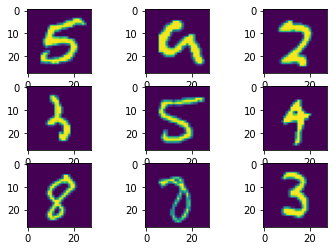

In [59]:
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(train_images[20000+i*50])

Como podemos observar en la siguiente linea la cantidad de imagenes para pruebas es demasiado basta por lo que los numeros grandes no nos deben de asustar.

In [60]:
print(test_images.shape)
print(train_images.shape)

(10000, 28, 28)
(60000, 28, 28)


Aqui dividimos las imagenes entre 255 para que los valores de color solo puedan ser 0 o 1

In [61]:
train_images  = train_images / 255.0
test_images = test_images / 255.0

Utilizamos un modelo secuencial con 4 capas densas y una oculta

In [62]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28,28,1)))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(20, activation='softmax'))

Seleccionamos el compilador, en este caso utilizamos el de adam

In [63]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

Ahora entrenamos nuestra IA, guardaremos los datos en la variable "history" para despues utilizarlos al graficar

In [64]:
history = model.fit(train_images, training_labels, epochs=10,
 validation_data = (test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9499 - accuracy: 0.7020 - val_loss: 0.5961 - val_accuracy: 0.8189
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5630 - accuracy: 0.8308 - val_loss: 0.5142 - val_accuracy: 0.8446
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5007 - accuracy: 0.8518 - val_loss: 0.4738 - val_accuracy: 0.8609
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4700 - accuracy: 0.8601 - val_loss: 0.4551 - val_accuracy: 0.8644
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4492 - accuracy: 0.8661 - val_loss: 0.4409 - val_accuracy: 0.8695
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4341 - accuracy: 0.8700 - val_loss: 0.4277 - val_accuracy: 0.8709
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4155 - accuracy: 0.8763 - val_loss: 0.4094 - val_accuracy:

Aqui podemos ver como la grafica del entrenamiento va practicamente igual con la de validacion

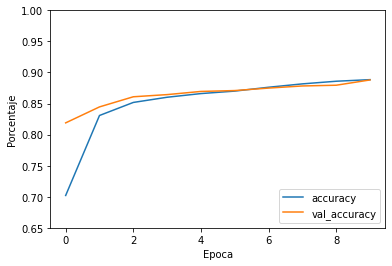

In [66]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoca')
plt.ylabel('Porcentaje')
plt.ylim([0.65, 1])
plt.legend(loc='lower right')

In [67]:
print(model.evaluate(test_images,test_labels))

313/313 [==============================] - 1s 2ms/step - loss: 0.3846 - accuracy: 0.8880
[0.3845961093902588, 0.8880000114440918]


0


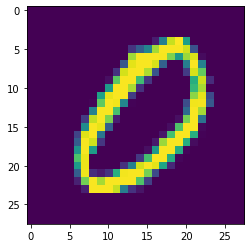

In [71]:
x=5483
plt.imshow(test_images[x])
prediction=model.predict(test_images)
print(np.argmax(prediction[x]))